In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [308]:
episilon = 8.854e-12
e = 1.6e-19
dR = 0.005
dt = 1e-16
u = 1.66e-27
Z1 = 11
Z2 = 52
M1 = 22.99*u
M2 = 127.6*u
#C = 0.54 +0.045*(np.sqrt(Z1)+np.sqrt(Z2))
C = 0.6
s1 = 1.8
s2 = 1.4

In [340]:
def potential(Z1,Z2,R,C):
    
    # calculate Thomas-Fermi model(TFM)
    # Firsov screening length
    a= 0.4685/(Z1**0.5 + Z2**0.5)**0.23
    
    V=[]
    for r in [R,R+dR]:
        r_a = r/a
        phi = 0.35*np.exp(-0.3*r_a)+0.55*np.exp(-1.2*r_a)+0.1*np.exp(-6*r_a)
        r/=1e10
        V += [Z1*Z2*e*e / (4*np.pi*episilon*r)*phi*C]
    
    return V[0],(V[1]-V[0])/dR*1e10 #return poterntial and force in SI

def update(p1,v1,p2,v2):
    
    x1,y1 = p1
    v1_x, v1_y = v1
    x2,y2 = p2
    v2_x, v2_y = v2
    
    R = np.sqrt((x1-x2)**2+(y1-y2)**2)
    V,F = potential(Z1,Z2,R,C)
    
    a1 = -F/M1*1e10  # convert to Å
    a2 = F/M2*1e10

    cos = (x1-x2)/R
    sin = (y1-y2)/R
    
    
    x1 += v1_x*dt
    y1 += v1_y*dt
    v1_x += a1*cos*dt
    v1_y += a1*sin*dt
    
    x2 += v2_x*dt
    y2 += v2_y*dt
    v2_x += a2*cos*dt
    v2_y += a2*sin*dt
    
    return [x1,y1],[v1_x,v1_y],[x2,y2],[v2_x,v2_y]
    
def block(P1,E,bound):
    
    v = np.sqrt(2*E*e/M1)*1e10
    
    p2 = [0,0]
    v2 = [0,0]
    l,u,r,b = bound
    
    fig,ax = plt.subplots(figsize=(8, 8*(u-b)/(r-l)))
    plt.axis([l,r,b,u])
    
    plt.plot([P1[0]],[P1[1]],marker='o')
    plt.plot([p2[0]],[p2[1]],marker='o')
    
    
    for angle in np.linspace(-50,50,44):
        
        v1 = [v*np.sin(angle/180*np.pi),-v*np.cos(angle/180*np.pi)]
        p1 = P1
        p2 = [0,0]
        v2 = [0,0]
    
        while l<p1[0]<r and b<p1[1]<u:
            #print(p1,v1,p2,v2)
            p1,v1,p2,v2 = update(p1,v1,p2,v2)          

            plt.plot([p1[0]],[p1[1]],".")
            
def shawdow(P1_y,E,bound):
    
    v = np.sqrt(2*E*e/M1)*1e10
    
    p2 = [0,0]
    v2 = [0,0]
    l,u,r,b = bound
    
    fig,ax = plt.subplots(figsize=(8, 8*(u-b)/(r-l)))
    plt.axis([l,r,b,u])
    plt.plot([p2[0]],[p2[1]],'o')
    
    for p1_x in np.linspace(-3,3,40):
        
        v1 = [0,-v]
        p1 = [p1_x,P1_y]
        p2 = [0,0]
        v2 = [0,0]
    
        while l<p1[0]<r and b<p1[1]<u:
            #print(p1,v1,p2,v2)
            p1,v1,p2,v2 = update(p1,v1,p2,v2)
            plt.plot([p1[0]],[p1[1]],".")
        
        

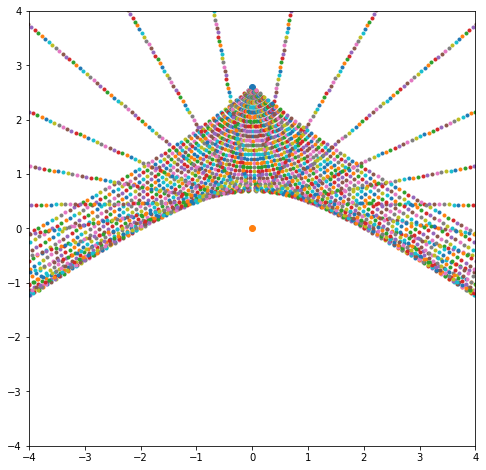

In [341]:
block([0,2.6],1000,[-4,4,4,-4])

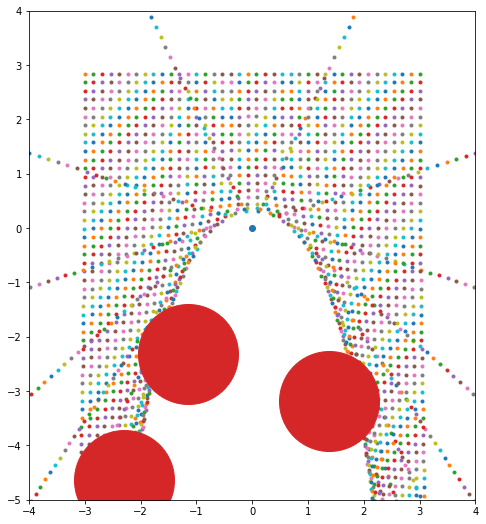

In [313]:
shawdow(3,3000,[-4,4,4,-5])
plt.plot([-1.15,1.37,-2.3],[-2.32,-3.18,-4.64],'o',markersize=100)

In [160]:
C

1.013747730357752

In [241]:
from mpl_toolkits.mplot3d import Axes3D

In [242]:
def pointdistance(point1,point2):
    x1,y1,z1 = point1
    x2,y2,z2 = point2
    d = np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)
    return d

In [325]:
Te1 = [0,0,0]
Te2 = [0,3.86,0]
Te5 = [0,7.72,0]
Ni = [1.13,1.93,-1.325]
Te3 = [-1.13,1.93,-2.65]
mid = [0,1.93,-1.9875]
Te4 = [2.26,3.86,-2.65]
face=list(zip(Te1,Te2,Ni))


print(pointdistance(Te4,Te1))
print(face)

5.199009521053024
[(0, 0, 1.13), (0, 3.86, 1.93), (0, 0, -1.325)]


In [267]:
line1 = [0,np.cos(40/180*np.pi),-np.sin(40/180*np.pi)]

In [278]:
dd = np.linspace(0,5,100)

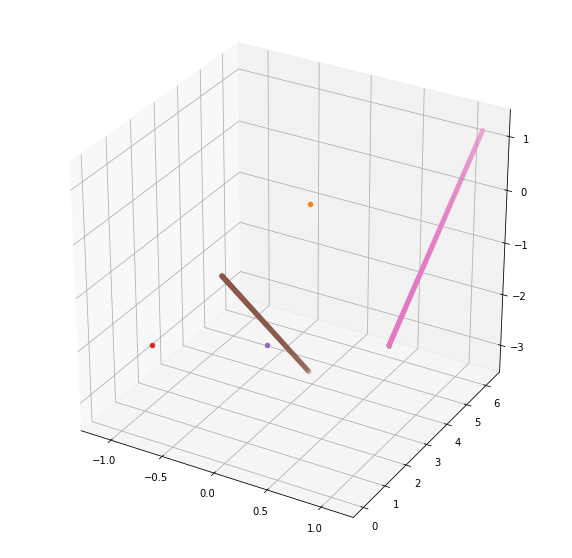

In [321]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter([Te1[0]],[Te1[1]],[Te1[2]],marker='o')
ax.scatter([Te2[0]],[Te2[1]],[Te2[2]],marker='o')
ax.scatter([Ni[0]],[Ni[1]],[Ni[2]],marker='*')
ax.scatter([Te3[0]],[Te3[1]],[Te3[2]],marker='o')
ax.scatter([mid[0]],[mid[1]],[mid[2]],marker='o')


#ax.plot_surface(np.array(face[0]),np.array(face[1]),np.array(face[2]), edgecolor='none');
ax.scatter([Te1[0]+dd*line1[0]],[Te1[1]+dd*line1[1]],[Te1[2]+dd*line1[2]],marker='o')
ax.scatter([Ni[0]+dd*line2[0]],[Ni[1]+dd*line2[1]],[Ni[2]+dd*line2[2]],marker='o')

In [328]:

def pointlinemin(point,line,startpoint):
    
    d_min = 1000
    
    min_px =startpoint
    
    for k in dd:
        
        px = [startpoint[0]+k*line[0],startpoint[1]+k*line[1],startpoint[2]+k*line[2]]
        
        
        if pointdistance(point,px) < d_min:
            
            d_min = pointdistance(point,px)
            min_px = px
    return d_min,pointdistance(startpoint,min_px), min_px 

In [329]:
pointlinemin(Ni,line1,Te1)

(1.1523152129011545,
 2.323232323232323,
 [0.0, 1.7796992112865146, -1.4933449517970103])

In [330]:
pointlinemin(Te3,line1,Te1)

(1.3784454518639793,
 3.1818181818181817,
 [0.0, 2.4374141371967486, -2.045233303548079])

In [331]:
pointlinemin(Te4,line1,Te1)

(2.304630425802309,
 4.646464646464646,
 [0.0, 3.5593984225730293, -2.9866899035940206])

In [332]:
line2 = [0,np.cos(-30/180*np.pi),np.sin(30/180*np.pi)]

In [333]:
pointlinemin(Te2,line2,Ni)

(1.1446897857904679,
 2.323232323232323,
 [1.13, 3.941978210812332, -0.16338383838383863])

In [334]:
print([Ni[0]+dd*line2[0]],[Ni[1]+dd*line2[1]],[Ni[2]+dd*line2[2]])
                                         

[array([1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13,
       1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13,
       1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13,
       1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13,
       1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13,
       1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13,
       1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13,
       1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13,
       1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13,
       1.13])] [array([1.93      , 1.97373866, 2.01747731, 2.06121597, 2.10495463,
       2.14869328, 2.19243194, 2.2361706 , 2.27990925, 2.32364791,
       2.36738657, 2.41112522, 2.45486388, 2.49860254, 2.54234119,
       2.58607985, 2.62981851, 2.67355716, 2.71729582, 2.76103448,
       2.80477314, 2.84851179, 2.89225045, 2.93598911, 2.9

In [335]:
pointlinemin(Te5,line2,Ni)

(2.188322215963865, 5.0, [1.13, 6.260127018922193, 1.1749999999999996])